## SVM Support Vector Machine

In a linear aproach, SVM uses a linear model to find a linear decision boundary (generali Hyperplane) that best separates the data. The best hyperplane is the one that yields the largest separation/margin between both classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized.<br>
<br>
<div style="display: flex; justify-content: center;">
<img src="./images/svm.png" alt="Flower" style="width:500px;"/></div>

As first we should label points from the $\mathcal{P}$ space above, so that green color corresponds to `1` and blue corresponds to `-1`, in other words:<br>
<br> 
Every point $(x_1, x_2) \in \mathcal{P}$ has assigned a value $y\in\{-1,1\}$.
<br>
$$    
Hyperplane = 
     \begin{cases}
       w\cdot x_i - b \geq 1 &\quad\text{if}\quad y_i=1\\
       w\cdot x_i - b \leq -1 &\quad\text{if}\quad y_i=-1\\
     \end{cases}
$$

We are able to rewrite two equations above to only one.

$$ y_i(w\cdot x_i - b) \geq 1 $$

We have to use some sort of cost function to describe the distance between splitting line and nearest points. We can use `Hinge loss`

$$    
l = 
     \begin{cases}
       0 &\quad\text{if}\quad y \cdot (w\cdot x -b) \geq 1\\
       1 - y\cdot (w\cdot x -b) &\quad\text{otherwise}\\
     \end{cases}
$$

and the final form of cost function will be

$$    
J = 
     \begin{cases}
       \lambda\lVert w \rVert^2 &\quad\text{if}\quad y \cdot y \cdot (w\cdot x -b) \geq 1\\
       \lambda\lVert w \rVert^2 + 1 - y_i(w\cdot x_i -b) &\quad\text{otherwise}\\
     \end{cases}
$$

Now we want to find the maximum of $J$, so we have to find the gradient of the $J$ with respect to $w$ and $b$.

$$    
grad(J) = 
     \begin{cases}
       \frac{dJ_i}{dw_k} = 2\lambda w_k, \frac{dJ_i}{db} = 0 &\quad\text{if}\quad y \cdot y \cdot (w\cdot x -b) \geq 1\\
       \frac{dJ_i}{dw_k} = 2\lambda w_k - y_i\cdot x_{ik}, \frac{dJ_i}{db} = y_i &\quad\text{otherwise}\\
     \end{cases}
$$

We can use the $grad(J)$ to implement the gradient descent and find the splitting line.

In [1]:
import numpy as np

class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

clf = SVM()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [14]:
import pandas as pd

df = pd.DataFrame(data = X_test, columns=["x1", "x2"])
df["result"] = predictions
df.head()

x1        x2  result
0  7.542874 -5.352841     1.0
1  5.225978 -5.550335     1.0
2  6.507538 -3.625618     1.0
3 -3.094421 -9.240961    -1.0
4  5.673811 -3.339634     1.0

In [15]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()


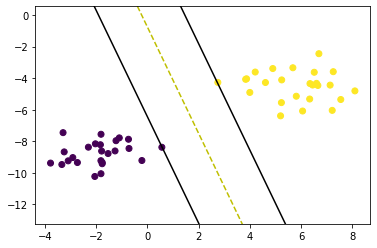

In [16]:
visualize_svm()